In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    make_scorer
)

# Base classifiers
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ensemble methods
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    StackingClassifier
)


In [2]:
df = pd.read_csv("churn.csv")


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [4]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
# Convert target variable to binary
df['Churn?'] = df['Churn?'].str.strip().map({'False.': 0, 'True.': 1})

# Drop irrelevant columns
df.drop(['Phone'], axis=1, inplace=True)

# Convert categorical features to numeric
cat_cols = ['State', "Int'l Plan", 'VMail Plan']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [6]:
df.head()

,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
X = df.drop('Churn?', axis=1)  # Features
y = df['Churn?']               # Target


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)


In [9]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[846   9]
 [ 53  92]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       855
           1       0.91      0.63      0.75       145

    accuracy                           0.94      1000
   macro avg       0.93      0.81      0.86      1000
weighted avg       0.94      0.94      0.93      1000

Accuracy: 0.938


recall for 1 is very low

In [10]:
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)



In [11]:
# Scale features
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train_all)
X_test = scaler.transform(X_test)


In [12]:
X_train_all

array([[ 0.90235656,  0.71072961, -0.5107321 , ...,  1.44537268,
         1.01225356, -1.20282632],
       [ 1.57813912,  1.28536821,  1.75659106, ..., -1.03104431,
        -2.08997043, -0.43295148],
       [ 0.96993481, -0.58845332,  1.75659106, ..., -0.61830814,
         0.45176772,  1.87667306],
       ...,
       [ 1.3078261 ,  0.11110672, -0.5107321 , ...,  0.20716419,
         0.62121693,  1.10679821],
       [-0.65194334, -0.76334332, -0.67779801, ..., -1.85651664,
        -3.60197876,  1.10679821],
       [-1.26014765, -0.51350045, -0.67779801, ..., -0.20557198,
        -0.25209823,  1.10679821]])

In [13]:


num_splits = 7
kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

models = []

for train_idx, val_idx in kf.split(X_train_all_scaled, y_train_all):
    # Use numpy indexing since X_train_all_scaled is np.ndarray
    X_train_fold = X_train_all_scaled[train_idx]
    y_train_fold = y_train_all.iloc[train_idx]  # y_train_all can stay pandas Series

    model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
    model.fit(X_train_fold, y_train_fold)
    models.append(model)


In [14]:
# Collect predicted class labels (0 or 1) from each model for X_test
test_preds_class = []

for model in models:
    preds = model.predict(X_test)  # predicted classes (0 or 1)
    test_preds_class.append(preds)

# Convert to numpy array: shape (5, number_of_test_samples)
test_preds_class = np.array(test_preds_class)

# For each test sample, count how many models predicted class 1
votes_for_class_1 = np.sum(test_preds_class == 1, axis=0)

# Majority vote: if >=3 models predict class 1, final prediction = 1; else 0
y_pred= (votes_for_class_1 >= num_splits//2+1).astype(int)


In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.915
Confusion Matrix:
 [[804  51]
 [ 34 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       855
           1       0.69      0.77      0.72       145

    accuracy                           0.92      1000
   macro avg       0.82      0.85      0.84      1000
weighted avg       0.92      0.92      0.92      1000



precision and recall for 1 is very low

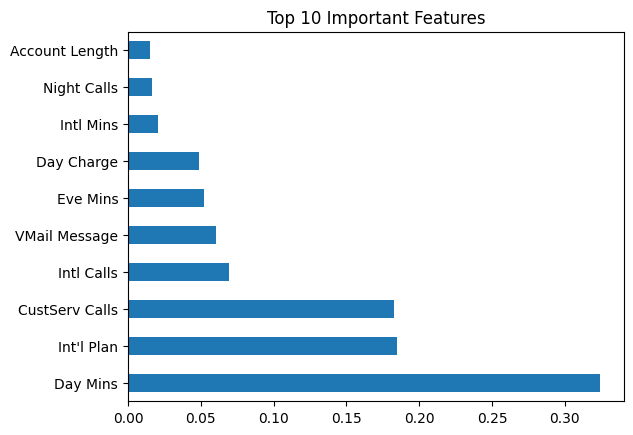

In [16]:
import matplotlib.pyplot as plt

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [19]:

#1, Make sure these are pandas objects
X_train_all = pd.DataFrame(X_train_all)
y_train_all = pd.Series(y_train_all)



# 2. Create 5 Random Forest models using Stratified K-Fold
num_splits = 7
kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

models = []

for train_idx, val_idx in kf.split(X_train_all, y_train_all):
    X_train, y_train = X_train_all.iloc[train_idx], y_train_all.iloc[train_idx]

    rf = RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42,
        max_depth=5
    )
    rf.fit(X_train, y_train)
    models.append(rf)

# 3. Collect predictions from each model for the same test set
test_preds_class = []

for model in models:
    preds = model.predict(X_test)  # class labels (0 or 1)
    test_preds_class.append(preds)

# 4. Stack and apply majority voting
test_preds_class = np.array(test_preds_class)  # shape: (5, num_samples)
votes_for_class_1 = np.sum(test_preds_class == 1, axis=0)

# Majority voting: at least 3 out of 5 models vote for class 1
y_pred = (votes_for_class_1 >= (num_splits // 2 + 1)).astype(int)

# 5. Evaluate
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.960     0.936     0.948       855
           1      0.671     0.772     0.718       145

    accuracy                          0.912      1000
   macro avg      0.816     0.854     0.833      1000
weighted avg      0.918     0.912     0.915      1000



not a good model

In [20]:


# 1. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 2. Define Base Learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)),
]

# 3. Define Meta-Learner
meta_learner = LogisticRegression()

# 4. Create Stacking Classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,  # internal cross-validation for base learners
    passthrough=False,  # set to True to pass original features + predictions to meta-learner
    stack_method='predict_proba'  # use class probabilities for stacking
)

# 5. Train
stack_model.fit(X_train, y_train)

# 6. Predict
y_pred = stack_model.predict(X_test)

# 7. Evaluate
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.943     0.950     0.946       855
           1      0.691     0.662     0.676       145

    accuracy                          0.908      1000
   macro avg      0.817     0.806     0.811      1000
weighted avg      0.906     0.908     0.907      1000



not a good model for 1

In [22]:


# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 2. Define 5 diverse base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))),  # scale needed
    ('gnb', GaussianNB()),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42))
]

# 3. Meta-model: SVM with scaling and probability output
meta_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', probability=True, random_state=42)
)

# 4. Create the stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    stack_method='predict_proba',
    cv=5
)

# 5. Train the stack
stack_model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = stack_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.955     0.977     0.966       855
           1      0.841     0.731     0.782       145

    accuracy                          0.941      1000
   macro avg      0.898     0.854     0.874      1000
weighted avg      0.939     0.941     0.939      1000



performance improved

In [23]:


# 1. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

# 2. Define 10 diverse base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)),
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))),
    ('gnb', GaussianNB()),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('sgd', make_pipeline(StandardScaler(), SGDClassifier(loss='log_loss', max_iter=1000, class_weight='balanced', random_state=42))),
    ('svc', make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, random_state=42)))
]

# 3. Define SVM as meta-model
meta_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', probability=True, random_state=42)
)

# 4. Create stacking classifier
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    stack_method='predict_proba',
    cv=5,
    n_jobs=-1  # speed up training
)

# 5. Train
stack_model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = stack_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.959     0.982     0.971      1425
           1      0.879     0.752     0.811       242

    accuracy                          0.949      1667
   macro avg      0.919     0.867     0.891      1667
weighted avg      0.947     0.949     0.947      1667



In [26]:

# Load and preprocess dataset
df = pd.read_csv("churn.csv")
df.rename(columns={'Churn?': 'Churn'}, inplace=True)
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
df.drop(columns=['State', 'Phone'], inplace=True)
for col in ["Int'l Plan", 'VMail Plan']:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=['Churn'])
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 10 Base models
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=1)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=2)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=3)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=4)),
    ('et', ExtraTreesClassifier(n_estimators=50, random_state=5)),
    ('lr', LogisticRegression(max_iter=1000, random_state=6)),
    ('sgd', SGDClassifier(max_iter=1000, tol=1e-3, random_state=7)),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True, random_state=8)),
]

# Define 3 meta-models
meta_models = {
    'rf_meta': RandomForestClassifier(n_estimators=100, random_state=42),
    'lr_meta': LogisticRegression(max_iter=1000, random_state=42),
    'gb_meta': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Train 3 stacking classifiers with the same base but different meta-models
stacking_models = {}
for name, meta_model in meta_models.items():
    stacking = StackingClassifier(
        estimators=base_models,
        final_estimator=meta_model,
        cv=5,
        n_jobs=-1,
        passthrough=False
    )
    stacking.fit(X_train, y_train)
    stacking_models[name] = stacking

# Get predictions from each stacking model
preds = []
for name, model in stacking_models.items():
    preds.append(model.predict(X_test))

# Convert list of arrays to numpy array (shape: 3 x number_of_samples)
preds = np.array(preds)

# Majority vote across meta-model predictions (axis=0 over models)
from scipy.stats import mode
final_preds, _ = mode(preds, axis=0)

# final_preds is 2D (1 x n), flatten it
final_preds = final_preds.flatten()

# Evaluate majority vote predictions
print("Classification Report for Majority Vote Ensemble Meta-model:")
print(classification_report(y_test, final_preds))


Classification Report for Majority Vote Ensemble Meta-model:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       855
           1       0.88      0.77      0.82       145

    accuracy                           0.95      1000
   macro avg       0.92      0.87      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [28]:
meta_models = {
    'naive_bayes': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'svm': SVC(probability=True, random_state=42),
    'logistic_regression': LogisticRegression(max_iter=1000, random_state=42),
    'random_forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, meta in meta_models.items():
    stacking = StackingClassifier(
        estimators=base_models,
        final_estimator=meta,
        cv=5,
        n_jobs=-1,
        passthrough=False
    )
    stacking.fit(X_train, y_train)
    preds = stacking.predict(X_test)
    print(f"\nMeta-model: {name}")
    print(classification_report(y_test, preds))



Meta-model: naive_bayes
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       855
           1       0.67      0.84      0.74       145

    accuracy                           0.92      1000
   macro avg       0.82      0.89      0.85      1000
weighted avg       0.93      0.92      0.92      1000


Meta-model: knn
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       855
           1       0.88      0.74      0.80       145

    accuracy                           0.95      1000
   macro avg       0.92      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000


Meta-model: svm
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       855
           1       0.90      0.71      0.80       145

    accuracy                           0.95      1000
   macro avg       0.93      0.85      0.88      1000
weighted avg   

#New

In [29]:


# Load and preprocess data
df = pd.read_csv("churn.csv")
df.rename(columns={'Churn?': 'Churn'}, inplace=True)
X = df.drop(columns=['Churn', 'State', 'Phone'])
y = LabelEncoder().fit_transform(df['Churn'])

categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
numeric_cols = [c for c in X.columns if X[c].dtype != 'object']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=21
)

X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=1)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=2)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=3)),
    #('ada', AdaBoostClassifier(n_estimators=50, random_state=4)),
    ('et', ExtraTreesClassifier(n_estimators=50, random_state=5)),
    #('lr', LogisticRegression(max_iter=1000, random_state=6)),
    #('nb', GaussianNB()),
    #('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True, random_state=7)),
   # ('sgd', SGDClassifier(max_iter=1000, tol=1e-3, random_state=8))
]

# Define 5 meta-models
meta_models = {
    'naive_bayes': GaussianNB(),
    #'knn': KNeighborsClassifier(),
    #'svm': SVC(probability=True, random_state=42),
    'logistic_regression': LogisticRegression(max_iter=1000, random_state=42),
    'random_forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train stacking models with different meta-models and collect predictions
predictions = []

for name, meta in meta_models.items():
    stacking = StackingClassifier(
        estimators=base_models,
        final_estimator=meta,
        cv=5,
        n_jobs=-1,
        passthrough=False
    )
    stacking.fit(X_train, y_train)
    preds = stacking.predict(X_test)
    predictions.append(preds)
    print(f"\nMeta-model: {name}")
    print(classification_report(y_test, preds))

# Convert to numpy array (shape: 5 x n_samples)
predictions = np.array(predictions)

# Majority vote across meta-model predictions for each sample
final_preds, _ = mode(predictions, axis=0)
final_preds = final_preds.flatten()

print("\nFinal Majority Vote Ensemble Classification Report:")
print(classification_report(y_test, final_preds))



Meta-model: naive_bayes
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       855
           1       0.74      0.86      0.79       145

    accuracy                           0.94      1000
   macro avg       0.86      0.90      0.88      1000
weighted avg       0.94      0.94      0.94      1000


Meta-model: logistic_regression
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       855
           1       0.86      0.79      0.82       145

    accuracy                           0.95      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.95      0.95      0.95      1000


Meta-model: random_forest
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       855
           1       0.84      0.78      0.81       145

    accuracy                           0.95      1000
   macro avg       0.90      0.88      0.89

Meta-model: random_forest\
Meta-model: logistic_regression

In [30]:


# Load and preprocess data
df = pd.read_csv("churn.csv")
df.rename(columns={'Churn?': 'Churn'}, inplace=True)
X = df.drop(columns=['Churn', 'State', 'Phone'])
y = LabelEncoder().fit_transform(df['Churn'])

# Split feature types
categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
numeric_cols = [c for c in X.columns if X[c].dtype != 'object']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=21
)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Define two base models
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train both
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Predict probabilities
probs_lr = model_lr.predict_proba(X_test)[:, 1]  # Probability of class 1
probs_rf = model_rf.predict_proba(X_test)[:, 1]

# Average the probabilities
avg_probs = (probs_lr + probs_rf) / 2

# Make final predictions with threshold = 0.5
final_preds = (avg_probs >= 0.5).astype(int)

# Evaluation
print("Final Averaged Probability Ensemble Classification Report:")
print(classification_report(y_test, final_preds))


Final Averaged Probability Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       855
           1       0.91      0.52      0.66       145

    accuracy                           0.92      1000
   macro avg       0.92      0.75      0.81      1000
weighted avg       0.92      0.92      0.91      1000



In [31]:


# Load and preprocess data
df = pd.read_csv("churn.csv")
df.rename(columns={'Churn?': 'Churn'}, inplace=True)
X = df.drop(columns=['Churn', 'State', 'Phone'])
y = LabelEncoder().fit_transform(df['Churn'])

# Identify feature types
categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
numeric_cols = [c for c in X.columns if X[c].dtype != 'object']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Split data
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=21
)
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Base models
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=1)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=2)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=3)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=4)),
    ('et', ExtraTreesClassifier(n_estimators=50, random_state=5)),
    ('lr', LogisticRegression(max_iter=1000, random_state=6)),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True, random_state=7)),
    ('sgd', SGDClassifier(max_iter=1000, tol=1e-3, random_state=8)),
]

# Meta models
meta_lr = LogisticRegression(max_iter=1000, random_state=42)
meta_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train stacking models
stack_lr = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_lr,
    cv=5,
    n_jobs=-1,
    passthrough=False
)
stack_rf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_rf,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

stack_lr.fit(X_train, y_train)
stack_rf.fit(X_train, y_train)

# Predict probabilities from both meta models
probs_lr = stack_lr.predict_proba(X_test)[:, 1]
probs_rf = stack_rf.predict_proba(X_test)[:, 1]

# Average probabilities
avg_probs = (probs_lr + probs_rf) / 2

# Final prediction using threshold
final_preds = (avg_probs >= 0.5).astype(int)

# Evaluation
print("Final Meta-Ensemble Classification Report:")
print(classification_report(y_test, final_preds))


Final Meta-Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       855
           1       0.87      0.80      0.83       145

    accuracy                           0.95      1000
   macro avg       0.92      0.89      0.90      1000
weighted avg       0.95      0.95      0.95      1000



In [32]:


# 1. Load data
df = pd.read_csv("churn.csv")
df.rename(columns={'Churn?': 'Churn'}, inplace=True)
X = df.drop(columns=['Churn', 'State', 'Phone'])
y = LabelEncoder().fit_transform(df['Churn'])

# 2. Preprocessing
categorical_cols = [c for c in X.columns if X[c].dtype == 'object']
numeric_cols = [c for c in X.columns if X[c].dtype != 'object']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X = preprocessor.fit_transform(X)

# 3. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

# 4. Base models (tuples: name, model)
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=1)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=2)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=3)),
    #('ada', AdaBoostClassifier(n_estimators=50, random_state=4)),
    ('et', ExtraTreesClassifier(n_estimators=50, random_state=5)),
    #('lr', LogisticRegression(max_iter=1000, random_state=6)),
    #('nb', GaussianNB()),
    #('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True, random_state=7)),
   # ('sgd', SGDClassifier(max_iter=1000, tol=1e-3, random_state=8))
]

# 5. Generate base model predictions as meta features
def get_meta_features(models, X_train, y_train, X_test, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    train_meta = np.zeros((X_train.shape[0], len(models)))
    test_meta = np.zeros((X_test.shape[0], len(models)))

    for i, (name, model) in enumerate(models):  # ✅ unpack (name, model)
        test_meta_fold = np.zeros((n_folds, X_test.shape[0]))
        for j, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            X_tr, X_val = X_train[train_idx], X_train[val_idx]
            y_tr, y_val = y_train[train_idx], y_train[val_idx]

            # Train model
            model.fit(X_tr, y_tr)

            # Handle models without predict_proba (like SGD)
            if hasattr(model, "predict_proba"):
                val_preds = model.predict_proba(X_val)[:, 1]
                test_preds = model.predict_proba(X_test)[:, 1]
            else:
                val_preds = model.decision_function(X_val)
                val_preds = (val_preds - val_preds.min()) / (val_preds.max() - val_preds.min() + 1e-8)  # normalize
                test_preds = model.decision_function(X_test)
                test_preds = (test_preds - test_preds.min()) / (test_preds.max() - test_preds.min() + 1e-8)

            train_meta[val_idx, i] = val_preds
            test_meta_fold[j] = test_preds

        test_meta[:, i] = test_meta_fold.mean(axis=0)

    return train_meta, test_meta

# 6. Get meta features
train_meta_features, test_meta_features = get_meta_features(
    base_models, X_train, y_train, X_test
)

# 7. Meta models
meta_lr = LogisticRegression(max_iter=1000, random_state=42)
meta_rf = RandomForestClassifier(n_estimators=100, random_state=42)

meta_lr.fit(train_meta_features, y_train)
meta_rf.fit(train_meta_features, y_train)

# 8. Predict meta-model probabilities
probs_lr = meta_lr.predict_proba(test_meta_features)[:, 1]
probs_rf = meta_rf.predict_proba(test_meta_features)[:, 1]

# 9. Average the probabilities
avg_probs = (probs_lr + probs_rf) / 2
final_preds = (avg_probs >= 0.5).astype(int)

# 10. Final Evaluation
print("Final Stacked Ensemble Classification Report:")
print(classification_report(y_test, final_preds))


Final Stacked Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1425
           1       0.88      0.79      0.83       242

    accuracy                           0.95      1667
   macro avg       0.92      0.89      0.90      1667
weighted avg       0.95      0.95      0.95      1667



In [33]:
thresholds = np.arange(0.3, 0.6, 0.01)
for t in thresholds:
    preds = (avg_probs >= t).astype(int)
    print(f"\nThreshold {t:.2f}")
    print(classification_report(y_test, preds))



Threshold 0.30
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1425
           1       0.83      0.82      0.83       242

    accuracy                           0.95      1667
   macro avg       0.90      0.90      0.90      1667
weighted avg       0.95      0.95      0.95      1667


Threshold 0.31
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1425
           1       0.83      0.82      0.83       242

    accuracy                           0.95      1667
   macro avg       0.90      0.90      0.90      1667
weighted avg       0.95      0.95      0.95      1667


Threshold 0.32
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1425
           1       0.84      0.82      0.83       242

    accuracy                           0.95      1667
   macro avg       0.90      0.90      0.90      1667
weighted avg       0.95   

In [34]:


# Define your models (unchanged)
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=1)),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=2)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=3)),
    ('ada', AdaBoostClassifier(n_estimators=50, random_state=4)),
    ('et', ExtraTreesClassifier(n_estimators=50, random_state=5)),
    ('lr', LogisticRegression(max_iter=1000, random_state=6)),
    ('nb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True, random_state=7)),
    ('sgd', SGDClassifier(max_iter=1000, tol=1e-3, random_state=8))
]

# Use StratifiedKFold to preserve class distribution
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorer (F1-score for class 1)
f1 = make_scorer(f1_score, pos_label=1)

# Evaluate each model
model_scores = []

for name, model in base_models:
    scores = cross_val_score(model, X, y, scoring=f1, cv=kf, n_jobs=-1)
    model_scores.append((name, scores.mean()))
    print(f"{name}: F1-score = {scores.mean():.4f} ± {scores.std():.4f}")

# Sort models by mean F1-score
model_scores.sort(key=lambda x: x[1], reverse=True)

print("\n🔝 Best models by F1-score:")
for name, score in model_scores:
    print(f"{name}: {score:.4f}")


dt: F1-score = 0.7660 ± 0.0302
rf: F1-score = 0.8074 ± 0.0277
gb: F1-score = 0.8075 ± 0.0162
ada: F1-score = 0.4325 ± 0.0457
et: F1-score = 0.7077 ± 0.0232
lr: F1-score = 0.3002 ± 0.0507
nb: F1-score = 0.4785 ± 0.0334
knn: F1-score = 0.3928 ± 0.0216
svc: F1-score = 0.6061 ± 0.0163
sgd: F1-score = 0.2460 ± 0.0896

🔝 Best models by F1-score:
gb: 0.8075
rf: 0.8074
dt: 0.7660
et: 0.7077
svc: 0.6061
nb: 0.4785
ada: 0.4325
knn: 0.3928
lr: 0.3002
sgd: 0.2460
